In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

def create_train_test_split(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42069)
    return X_train, X_test, Y_train, Y_test

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [5]:
df = pd.read_csv('../data/mbti_preprocessed_complete.csv')
display(df.head())

,Unnamed: 0,type,posts,encodedType,preprocessed_posts,extro_intro,intu_obs,feel_think,prosp_judg
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,8,"['youtube', 'tumblr', 'enfp', 'intj', 'moment'...",0,1,1,0
1,1,ENTP,'I'm finding the lack of me in these posts ver...,3,"['im', 'finding', 'the', 'lack', 'of', 'post',...",1,1,0,1
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,11,"['good', 'one', 'youtube', 'of', 'course', 'i'...",0,1,0,1
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",10,"['dear', 'intp', 'i', 'enjoyed', 'conversation...",0,1,0,0
4,4,ENTJ,'You're fired.|||That's another silly misconce...,2,"['youre', 'fired', 'thats', 'another', 'silly'...",1,1,0,0


In [6]:
X = df.iloc[:,4].values
Y_EI = df.iloc[:,5].values # E Extroverted (1) - I Introverted (0)
Y_NS = df.iloc[:,6].values # N Intuitive (1) - S Observant (0)
Y_FT = df.iloc[:,7].values # F Feeling (1) - T Thinking (0)
Y_PJ = df.iloc[:,8].values # P Prospective (1) - J Judging (0)
print('Extroverted (1) - Introverted (0)')
display(pd.DataFrame(Y_EI).value_counts())
print('Intuitive (1) -  Observant (0)')
display(pd.DataFrame(Y_NS).value_counts())
print('Feeling (1) - Thinking (0)')
display(pd.DataFrame(Y_FT).value_counts())
print('Prospective (1) - Judging (0)')
display(pd.DataFrame(Y_PJ).value_counts())

tf_idf_vectorizer = TfidfVectorizer(use_idf=True, min_df = 0.1, max_df = 0.3)

X = tf_idf_vectorizer.fit_transform(X).toarray()

Extroverted (1) - Introverted (0)


0    6676
1    1999
dtype: int64

Intuitive (1) -  Observant (0)


1    7478
0    1197
dtype: int64

Feeling (1) - Thinking (0)


1    4694
0    3981
dtype: int64

Prospective (1) - Judging (0)


1    5241
0    3434
dtype: int64

In [7]:
#label_Y = dict('EI':'Y_EI', 'NS':'Y_NS', 'FT':'Y_FT', 'PJ':'Y_PJ')
#for label, Y in label_Y:
#    X_train, X_test, Y_train_label, Y_test_label = create_train_test_split(X, Y)

X_train, X_test, Y_train_EI, Y_test_EI = create_train_test_split(X, Y_EI)
X_train, X_test, Y_train_NS, Y_test_NS = create_train_test_split(X, Y_NS)
X_train, X_test, Y_train_FT, Y_test_FT = create_train_test_split(X, Y_FT)
X_train, X_test, Y_train_PJ, Y_test_PJ = create_train_test_split(X, Y_PJ)


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

import xgboost as xg
model = xg.XGBClassifier()

C:\Users\maria\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


##### EI: Extroverted - Introverted
Fit Model and determine Accuracy

In [9]:
# balance data
sampler = RandomOverSampler()
X_train_balanced, Y_train_EI_balanced = sampler.fit_resample(X_train, Y_train_EI)

In [10]:
model.fit(X_train_balanced, Y_train_EI_balanced)

C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:39:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
predict_EI = model.predict(X_test)
model.save_model("xgb_EI_balanced.json")

In [12]:
print("Classification Report:")
print(classification_report(Y_test_EI, predict_EI, target_names=['I','E']))

Classification Report:
              precision    recall  f1-score   support

           I       0.87      0.90      0.88      2002
           E       0.62      0.54      0.58       601

    accuracy                           0.82      2603
   macro avg       0.74      0.72      0.73      2603
weighted avg       0.81      0.82      0.81      2603



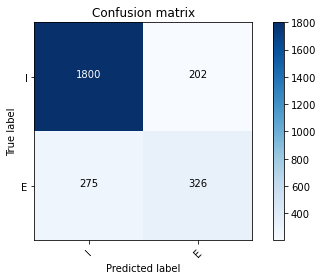

In [13]:
# ploted after Centroids Model
cnf = confusion_matrix(Y_test_EI, predict_EI)
#print(cnf)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['I','E'])

##### NS: Intuitive - Observant
Fit Model and determine Accuracy

In [14]:
# balance data
sampler = RandomOverSampler()
X_train_balanced, Y_train_NS_balanced = sampler.fit_resample(X_train, Y_train_NS)

In [15]:
model.fit(X_train_balanced, Y_train_NS_balanced)
predict_NS = model.predict(X_test)
model.save_model("xgb_NS_balanced.json")

C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:41:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
print("Classification Report:")
print(classification_report(Y_test_NS, predict_NS, target_names=['S','N']))

Classification Report:
              precision    recall  f1-score   support

           S       0.55      0.39      0.46       342
           N       0.91      0.95      0.93      2261

    accuracy                           0.88      2603
   macro avg       0.73      0.67      0.69      2603
weighted avg       0.86      0.88      0.87      2603



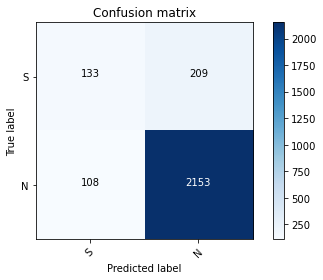

In [17]:
cnf = confusion_matrix(Y_test_NS, predict_NS)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['S','N'])

##### FT: Feeling - Thinking
Fit Model and determine Accuracy

In [18]:
# balance data
sampler = RandomOverSampler()
X_train_balanced, Y_train_FT_balanced = sampler.fit_resample(X_train, Y_train_FT)

In [20]:
model.fit(X_train_balanced, Y_train_FT_balanced)
predict_FT = model.predict(X_test)
model.save_model("xgb_FT_balanced.json")

[05:42:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
print("Classification Report:")
print(classification_report(Y_test_FT, predict_FT, target_names=['T','F']))

Classification Report:
              precision    recall  f1-score   support

           T       0.78      0.77      0.78      1199
           F       0.81      0.82      0.81      1404

    accuracy                           0.79      2603
   macro avg       0.79      0.79      0.79      2603
weighted avg       0.79      0.79      0.79      2603



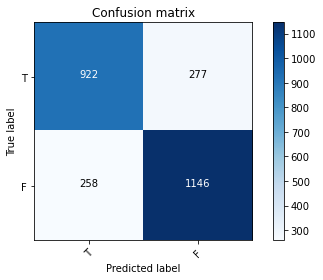

In [22]:
cnf = confusion_matrix(Y_test_FT, predict_FT)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['T','F'])

##### PJ: Prospective - Judging
Fit Model and determine Accuracy

In [23]:
# balance data
sampler = RandomOverSampler()
X_train_balanced, Y_train_PJ_balanced = sampler.fit_resample(X_train, Y_train_PJ)

In [24]:
model.fit(X_train_balanced, Y_train_PJ_balanced)
predict_PJ = model.predict(X_test)
model.save_model("xgb_PJ_balanced.json")

C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:43:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
print("Classification Report:")
print(classification_report(Y_test_PJ, predict_PJ, target_names=['J','P']))

Classification Report:
              precision    recall  f1-score   support

           J       0.71      0.60      0.65      1071
           P       0.75      0.83      0.79      1532

    accuracy                           0.74      2603
   macro avg       0.73      0.72      0.72      2603
weighted avg       0.73      0.74      0.73      2603



## merge binary model results

In [26]:
df1 = df[['encodedType', 'extro_intro', 'intu_obs', 'feel_think', 'prosp_judg']].drop_duplicates().reset_index(drop=True)
df1

,encodedType,extro_intro,intu_obs,feel_think,prosp_judg
0,8,0,1,1,0
1,3,1,1,0,1
2,11,0,1,0,1
3,10,0,1,0,0
4,2,1,1,0,0
5,0,1,1,1,0
6,9,0,1,1,1
7,1,1,1,1,1
8,13,0,0,1,1
9,15,0,0,0,1


In [28]:
Y_test_df = pd.DataFrame(np.transpose([Y_test_EI, Y_test_PJ, Y_test_NS, Y_test_FT]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
Y_test_df = Y_test_df.merge(df1, how = 'left', on = Y_test_df.columns.tolist())
Y_test_df

,extro_intro,intu_obs,feel_think,prosp_judg,encodedType
0,1,0,1,1,5
1,0,1,1,0,8
2,1,0,1,0,4
3,0,1,1,0,8
4,0,0,1,0,12
...,...,...,...,...,...
2598,0,1,1,0,8
2599,0,1,1,0,8
2600,0,0,1,1,13
2601,0,0,1,0,12


In [29]:
predict_df = pd.DataFrame(np.transpose([predict_EI, predict_PJ, predict_NS, predict_FT]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
predict_df = predict_df.merge(df1, how = 'left', on = predict_df.columns.tolist())
predict_df

,extro_intro,intu_obs,feel_think,prosp_judg,encodedType
0,1,0,1,1,5
1,0,1,1,1,9
2,0,1,1,0,8
3,0,1,1,0,8
4,0,0,1,0,12
...,...,...,...,...,...
2598,0,1,1,0,8
2599,0,0,1,0,12
2600,1,0,1,1,5
2601,0,1,1,0,8


In [30]:
print("Classification Report:")
print(classification_report(Y_test_df['encodedType'].values, predict_df['encodedType'].values))

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.51      0.50       196
           1       0.45      0.34      0.39       212
           2       0.18      0.07      0.10        28
           3       0.07      0.07      0.07        14
           4       0.23      0.20      0.22        74
           5       0.17      0.20      0.18        55
           6       0.00      0.00      0.00        11
           7       0.33      0.09      0.14        11
           8       0.44      0.56      0.49       378
           9       0.53      0.65      0.58       545
          10       0.46      0.44      0.45        86
          11       0.28      0.25      0.26        73
          12       0.50      0.42      0.46       365
          13       0.53      0.49      0.51       436
          14       0.27      0.13      0.18        61
          15       0.43      0.26      0.32        58

    accuracy                           0.47      2603
   

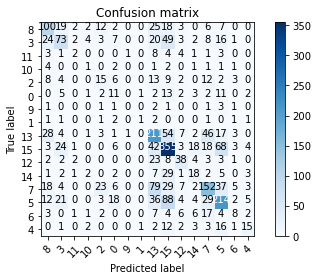

In [31]:
cnf = confusion_matrix(Y_test_df['encodedType'].values, predict_df['encodedType'].values)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = df1['encodedType'])